In [61]:
import tensorflow as tf
import cost 
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
test= "/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/train_model/sessions/mcnn_color_1/logs/test/events.out.tfevents.1554203230.daniel-tarro"
y_pred = 'density_pred'
y_true = 'density_gt'
cantidad_imagenes = 1

In [62]:
image_str = tf.placeholder(tf.string)
im_tf = tf.image.decode_image(image_str)
sess = tf.InteractiveSession()
count = 0

ruta = test.split('/')
ruta = ruta[:len(ruta)-1]

string = ""
for element in ruta:
    string += element +'/'

string +=  y_pred +'/'

/home/daniel/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


TypeError: Expected uint8, got 2.0 of type 'float' instead.

<Figure size 720x1800 with 0 Axes>

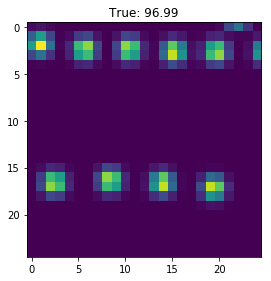

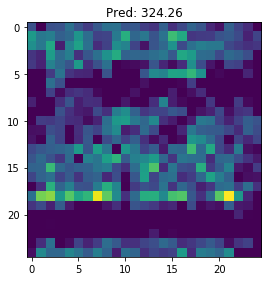

In [68]:
count = 0
cuenta_imagen = 1
with sess.as_default():
    for e in tf.train.summary_iterator(test):
        if(count == cantidad_imagenes+1):
                break
        for v in e.summary.value:

            if(count == cantidad_imagenes+1):
                break
                
            fig = plt.figure(figsize=(10,25))
            if y_pred in v.tag:
                im = im_tf.eval({image_str: v.image.encoded_image_string})
                output_n_ruta = os.path.realpath('{}/image_{:05d}.png'.format(string, count))
                if(im.shape[2] ==1):
                    imagen_pred=im/100
                    im=im[:,:,0]/100
                    fig.add_subplot(5,2,cuenta_imagen)
                    plt.imshow(im)
                    plt.title('Pred: {0}'.format(np.sum(im)))
                    count += 1
                    cuenta_imagen += 1
            if y_true in v.tag:
                im = im_tf.eval({image_str: v.image.encoded_image_string})
                output_n_ruta = os.path.realpath('{}/image_{:05d}.png'.format(string, count))
                if(im.shape[2] ==1):
                    imagen_true = im/100
                    im=im[:,:,0]/100
                    fig.add_subplot(5,2,cuenta_imagen)
                    plt.imshow(im)
                    plt.title('True: {0}'.format(np.sum(im)))
                    count += 1
            if(count == cantidad_imagenes+1):
#                 print(imagen_pred)
                tf.cast(imagen_pred, tf.float32) 
                tf.cast(imagen_true, tf.float32) 
                dice = cost.dice_coe(imagen_pred,imagen_true,axis=(1, 2))
                mse = cost.mse(imagen_pred,imagen_true)
                hard_dice = cost.dice_hard_coe(imagen_pred,imagen_true,axis=(1, 2))
                print("dice {0} mse {0} hard_dice {0}",dice,mse,hard_dice)
            
            